# INTRODUCTION

In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

In [44]:
pd.set_option('display.max_columns', 500)

# DATA OVERVIEW

| Variables | Details                                                                                                       |
|--------------|---------------------------------------------------------------------------------------------------------------|
| model        | Character, the model of the car, 18 possible values                                                           |
| year         | Numeric, year of manufacture from 1998 to 2020                                                                |
| **price**        | Numeric, listed value of the car in GBP                                                                       |
| transmission | Character, one of "Manual", "Automatic", "Semi-Auto" or "Other"                                               |
| mileage      | Numeric, listed mileage of the car at time of sale                                                             |
| fuelType     | Character, one of "Petrol", "Hybrid", "Diesel" or "Other"                                                     |
| tax          | Numeric, road tax in GBP. Calculated based on CO2 emissions or a fixed price depending on the age of the car. |
| mpg          | Numeric, miles per gallon as reported by manufacturer                                                         |
| engineSize   | Numeric, listed engine size, one of 16 possible values                                                        |

In [56]:
df = pd.read_csv('data/toyota.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,265,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,145,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,265,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,150,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,145,36.2,2.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   tax           6738 non-null   int64  
 7   mpg           6738 non-null   float64
 8   engineSize    6738 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 473.9+ KB


In [58]:
df.duplicated().sum()

39

## INITIAL DATA FIXING

In [59]:
df = df.drop_duplicates().copy()
df.shape

(6699, 9)

In [60]:
target = df['price'].copy()
target_label = 'price'

In [61]:
cats = [col for col in df.columns if df[col].dtype == 'object']
nums = [col for col in df.columns if df[col].dtype != 'object']
print(cats)
print(nums)

['model', 'transmission', 'fuelType']
['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


In [62]:
for col in cats:
    df[col] = df[col].str.strip()
    print(df[col].unique())

['GT86' 'Corolla' 'RAV4' 'Yaris' 'Auris' 'Aygo' 'C-HR' 'Prius' 'Avensis'
 'Verso' 'Hilux' 'PROACE VERSO' 'Land Cruiser' 'Supra' 'Camry' 'Verso-S'
 'IQ' 'Urban Cruiser']
['Manual' 'Automatic' 'Semi-Auto' 'Other']
['Petrol' 'Other' 'Hybrid' 'Diesel']


In [63]:
df['year'] = df['year'].astype('object')
cats = [col for col in df.columns if df[col].dtype == 'object']
nums = [col for col in df.columns if df[col].dtype != 'object']

In [64]:
df[cats].describe()

,model,year,transmission,fuelType
count,6699,6699,6699,6699
unique,18,23,4,4
top,Yaris,2017,Manual,Petrol
freq,2117,2015,3793,4058


In [65]:
df[nums].describe()

,price,mileage,tax,mpg,engineSize
count,6699.000000,6699.000000,6699.000000,6699.000000,6699.000000
mean,12529.799074,22889.588745,94.549933,63.078728,1.471996
std,6358.562625,19109.288501,73.942649,15.861037,0.435624
min,850.000000,2.000000,0.000000,2.800000,0.000000
25%,8266.500000,9488.500000,0.000000,55.400000,1.000000
50%,10798.000000,18571.000000,135.000000,62.800000,1.500000
75%,14995.000000,31059.500000,145.000000,70.600000,1.800000
max,59995.000000,174419.000000,565.000000,235.000000,4.500000


# EXPLORATORY DATA ANALYSIS

model


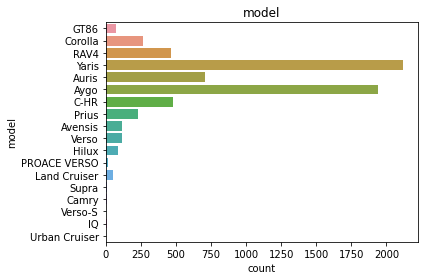

year


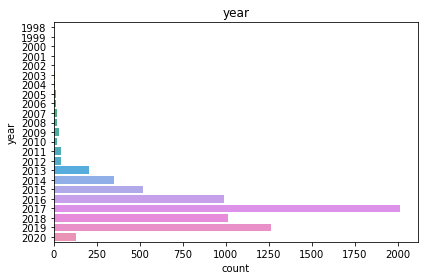

transmission


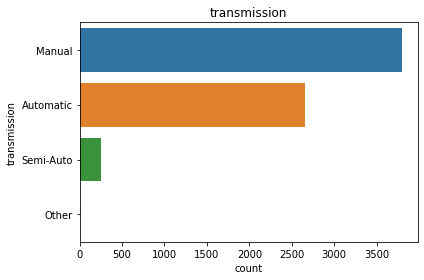

fuelType


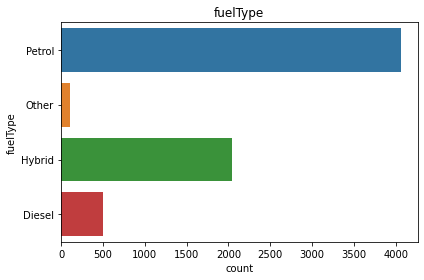

In [66]:
for col in cats:
    print(col)
    sns.countplot(data=df, y=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

model


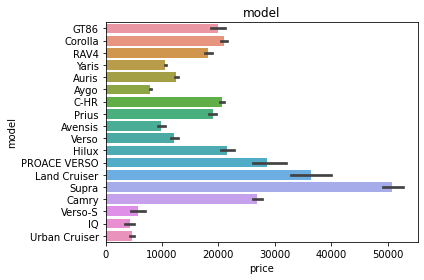

year


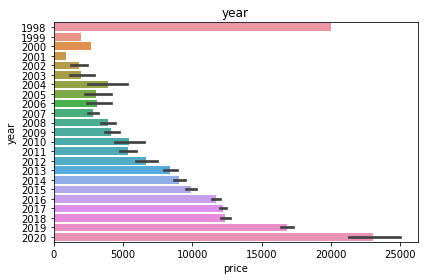

transmission


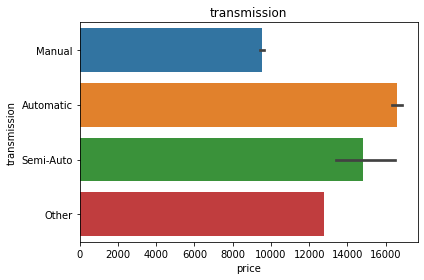

fuelType


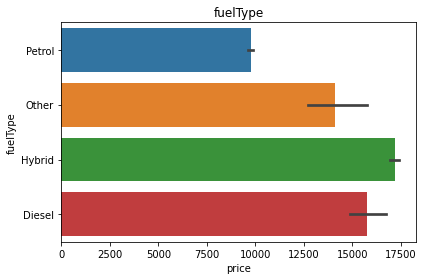

In [71]:
for col in cats:
    print(col)
    sns.barplot(data=df, y=col, x=target_label, orient='h')
    plt.title(col)
    plt.tight_layout()
    plt.show()

price


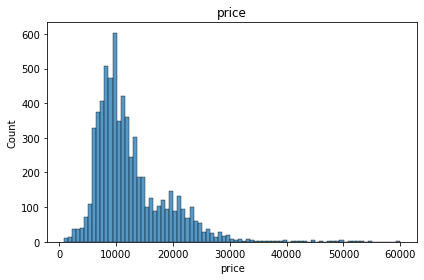

mileage


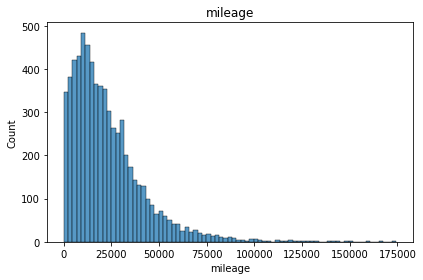

tax


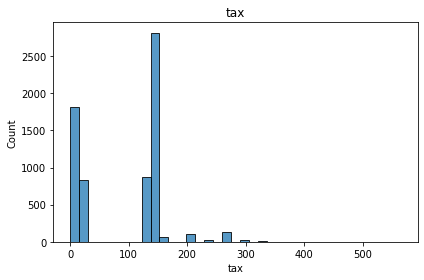

mpg


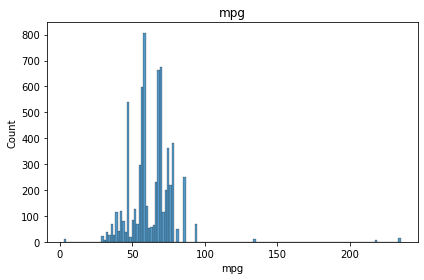

engineSize


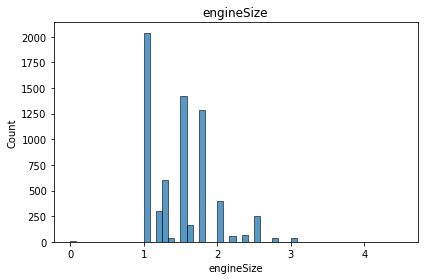

In [72]:
for col in nums:
    print(col)
    sns.histplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

price


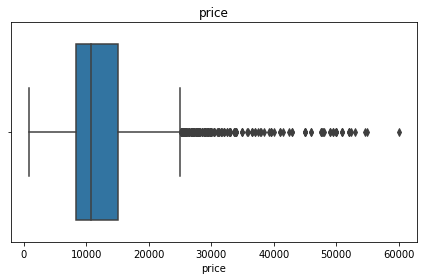

mileage


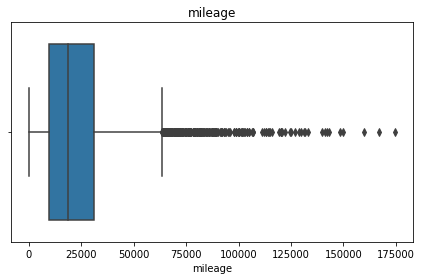

tax


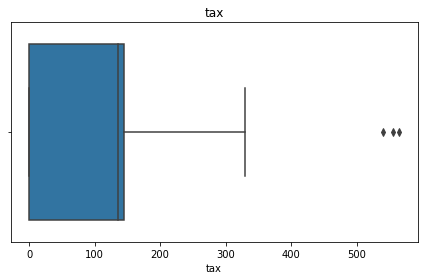

mpg


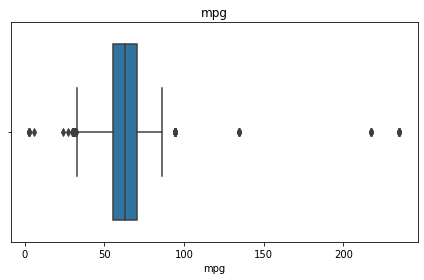

engineSize


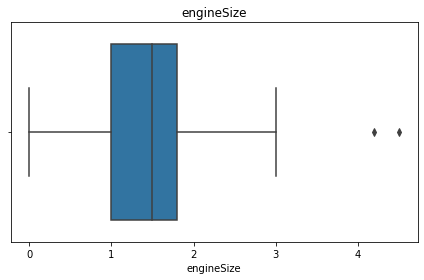

In [73]:
for col in nums:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

price


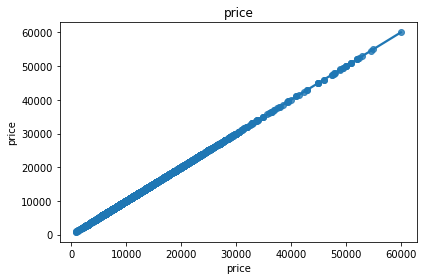

mileage


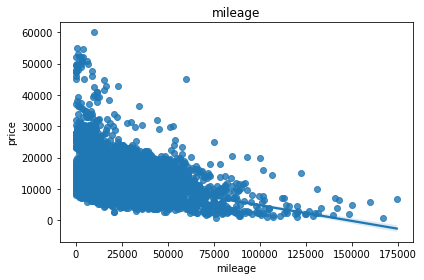

tax


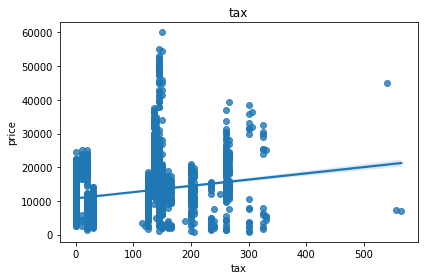

mpg


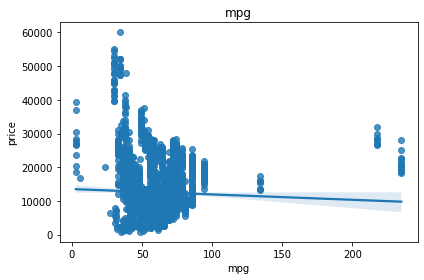

engineSize


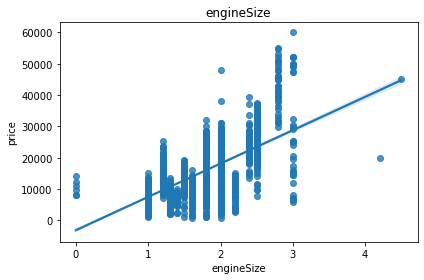

In [74]:
for col in nums:
    print(col)
    sns.regplot(data=df, x=col, y='price')
    plt.title(col)
    plt.tight_layout()
    plt.show()

# FEATURE EXTRACTION

In [494]:
df['mileage_log'] = df['mileage'].apply(lambda x: np.log(x) if x!= 0 else 1)
df['tax_log'] = df['tax'].apply(lambda x: np.log(x) if x!= 0 else 1)
df['mpg_log'] = df['mpg'].apply(lambda x: np.log(x) if x!= 0 else 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df['price']

# SPLITTING DATA

In [495]:
columns = [col for col in df.columns if col not in [target_label]]
cats = [col for col in columns if df[col].dtype == 'object']
nums = [col for col in columns if df[col].dtype != 'object']
X = df[columns].copy()
y = df[target_label].copy()
X.shape, y.shape

((6699, 11), (6699,))

In [496]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X.copy(), y.copy(), test_size=0.25, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5024, 11), (1675, 11), (5024,), (1675,))

# DATA TRANSFORMATION (TRAIN)

## OUTLIERS

## SCALING

In [497]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

In [498]:
# scaler.fit(X_train[nums])
# X_train_scaled = scaler.transform(X_train[nums])
# X_train[nums] = X_train_scaled
# X_train.head()

## ONE HOT ENCODING

In [499]:
from sklearn.preprocessing import OneHotEncoder
onehotcats = [col for col in cats]
ohe = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(X_train[onehotcats])

In [500]:
ohe.get_feature_names(onehotcats)

array(['model_Auris', 'model_Avensis', 'model_Aygo', 'model_C-HR',
       'model_Camry', 'model_Corolla', 'model_GT86', 'model_Hilux',
       'model_IQ', 'model_Land Cruiser', 'model_PROACE VERSO',
       'model_Prius', 'model_RAV4', 'model_Supra', 'model_Urban Cruiser',
       'model_Verso', 'model_Verso-S', 'model_Yaris', 'year_1998',
       'year_1999', 'year_2000', 'year_2001', 'year_2002', 'year_2003',
       'year_2004', 'year_2005', 'year_2006', 'year_2007', 'year_2008',
       'year_2009', 'year_2010', 'year_2011', 'year_2012', 'year_2013',
       'year_2014', 'year_2015', 'year_2016', 'year_2017', 'year_2018',
       'year_2019', 'year_2020', 'transmission_Automatic',
       'transmission_Manual', 'transmission_Semi-Auto', 'fuelType_Diesel',
       'fuelType_Hybrid', 'fuelType_Other', 'fuelType_Petrol'],
      dtype=object)

In [501]:
# X_train_ohe = ohe.transform(X_train[onehotcats])
# X_train[ohe.get_feature_names_out()] = X_train_ohe
# X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
# X_train.head()

In [502]:
X_train_ohe = ohe.transform(X_train[onehotcats])
to_merge = pd.DataFrame(X_train_ohe, columns=ohe.get_feature_names(onehotcats))
X_train = X_train.reset_index().drop('index', axis=1)
X_train[ohe.get_feature_names(onehotcats)] = to_merge
X_train = X_train[[col for col in X_train if col not in onehotcats]].copy()
X_train.head()

,mileage,tax,mpg,engineSize,mileage_log,tax_log,mpg_log,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Camry,model_Corolla,model_GT86,model_Hilux,model_IQ,model_Land Cruiser,model_PROACE VERSO,model_Prius,model_RAV4,model_Supra,model_Urban Cruiser,model_Verso,model_Verso-S,model_Yaris,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,11000,145,58.90,1.50,9.31,4.98,4.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,33248,0,69.00,1.00,10.41,1.00,4.23,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,27974,0,78.50,1.80,10.24,1.00,4.36,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
3,13833,145,43.50,2.00,9.53,4.98,3.77,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00
4,3711,145,47.90,1.50,8.22,4.98,3.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


In [503]:
X_train.shape

(5024, 55)

# DATA TRANSFORMATION (TEST)

## SCALING

In [504]:
# X_test_scaled = scaler.transform(X_test[nums])
# X_test[nums] = X_test_scaled
# X_test.head()

## ONE HOT ENCODING

In [505]:
X_test_ohe = ohe.transform(X_test[onehotcats])
to_merge = pd.DataFrame(X_test_ohe, columns=ohe.get_feature_names(onehotcats))
X_test = X_test.reset_index().drop('index', axis=1)
X_test[ohe.get_feature_names(onehotcats)] = to_merge
X_test = X_test[[col for col in X_test if col not in onehotcats]].copy()
X_test.head()

,mileage,tax,mpg,engineSize,mileage_log,tax_log,mpg_log,model_Auris,model_Avensis,model_Aygo,model_C-HR,model_Camry,model_Corolla,model_GT86,model_Hilux,model_IQ,model_Land Cruiser,model_PROACE VERSO,model_Prius,model_RAV4,model_Supra,model_Urban Cruiser,model_Verso,model_Verso-S,model_Yaris,year_1998,year_1999,year_2000,year_2001,year_2002,year_2003,year_2004,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,year_2019,year_2020,transmission_Automatic,transmission_Manual,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,43358,30,58.00,1.30,10.68,3.40,4.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
1,10091,145,47.90,1.50,9.22,4.98,3.87,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00
2,14012,145,67.30,1.00,9.55,4.98,4.21,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,15424,0,78.50,1.80,9.64,1.00,4.36,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00
4,5517,145,39.20,1.20,8.62,4.98,3.67,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00


# FEATURE SELECTION

## FEATURE IMPORTANCE

In [506]:
# from sklearn.ensemble import RandomForestClassifier
# from boruta import BorutaPy

# rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
# rf.fit(X_train, y_train)

In [507]:
# brt = BorutaPy(rf, n_estimators='auto', random_state=42)
# brt.fit(np.array(X_train), np.array(y_train))
# brt_ranking = brt.ranking_

In [508]:
# plt.figure(figsize=(10,10))
# sns.scatterplot(y=[col for col in X_train.columns.values], x=brt_ranking, hue=brt_ranking)

In [509]:
# selected_features = {}
# for i, col in enumerate(X_train.columns):
#     if brt_ranking[i] <= 20:
#         selected_features[col] = brt_ranking[i]
# selected_features

In [510]:
# features = [k for k in selected_features.keys()]

## MUTUAL INFORMATION

In [511]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

In [512]:
features_cat = [col for col in ohe.get_feature_names(onehotcats)]
select = SelectKBest(score_func=mutual_info_regression, k=5)
selector = select.fit(X_train[features_cat], y_train)

In [513]:
scores = pd.DataFrame(features_cat)
scores['score'] = selector.scores_
scores = scores.sort_values('score', ascending=False)

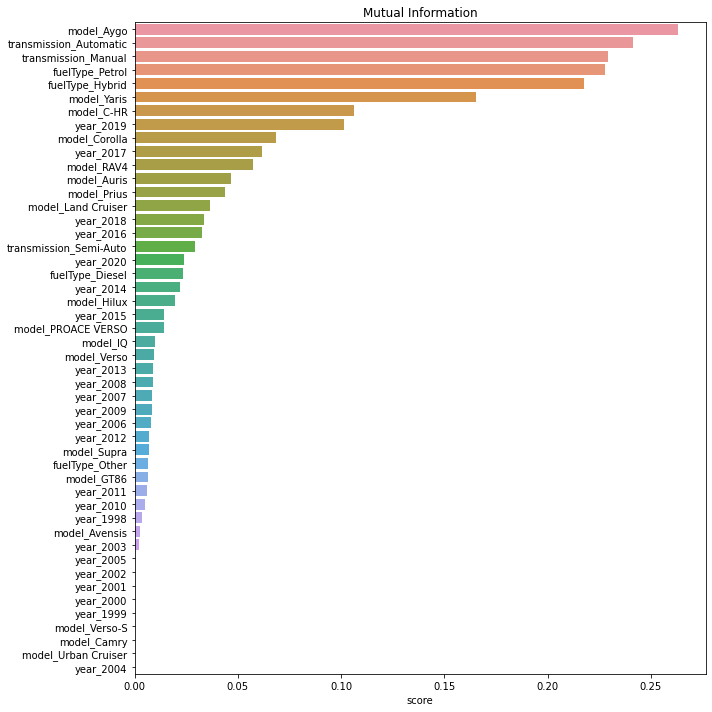

In [514]:
plt.figure(figsize=(10,10))
sns.barplot(data=scores, x='score', y=0)
plt.title('Mutual Information')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [515]:
filtered_score = scores[scores['score']<=0.1]
filtered_score[0].values

array(['model_Corolla', 'year_2017', 'model_RAV4', 'model_Auris',
       'model_Prius', 'model_Land Cruiser', 'year_2018', 'year_2016',
       'transmission_Semi-Auto', 'year_2020', 'fuelType_Diesel',
       'year_2014', 'model_Hilux', 'year_2015', 'model_PROACE VERSO',
       'model_IQ', 'model_Verso', 'year_2013', 'year_2008', 'year_2007',
       'year_2009', 'year_2006', 'year_2012', 'model_Supra',
       'fuelType_Other', 'model_GT86', 'year_2011', 'year_2010',
       'year_1998', 'model_Avensis', 'year_2003', 'year_2005',
       'year_2002', 'year_2001', 'year_2000', 'year_1999',
       'model_Verso-S', 'model_Camry', 'model_Urban Cruiser', 'year_2004'],
      dtype=object)

In [516]:
features1 = [col for col in X_train.columns if col not in filtered_score[0].values]
features1

['mileage',
 'tax',
 'mpg',
 'engineSize',
 'mileage_log',
 'tax_log',
 'mpg_log',
 'model_Aygo',
 'model_C-HR',
 'model_Yaris',
 'year_2019',
 'transmission_Automatic',
 'transmission_Manual',
 'fuelType_Hybrid',
 'fuelType_Petrol']

## F REGRESSION

In [517]:
from sklearn.feature_selection import f_regression

In [518]:
features_num = [col for col in nums]
select = SelectKBest(score_func=f_regression, k='all')
selector = select.fit(X_train[features_num], y_train)

In [519]:
scores = pd.DataFrame(features_num)
scores['score'] = selector.scores_
scores = scores.sort_values('score', ascending=False)

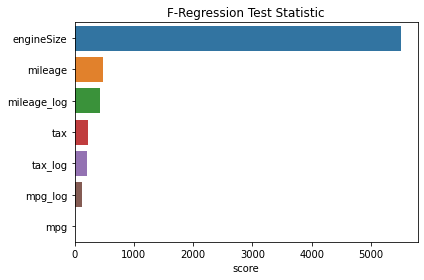

In [520]:
sns.barplot(data=scores, x='score', y=0)
plt.title('F-Regression Test Statistic')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [521]:
filtered_score = scores[scores['score']<=50]
filtered_score[0].values

array(['mpg'], dtype=object)

In [522]:
features2 = [col for col in features1 if col not in filtered_score[0].values]
features2

['mileage',
 'tax',
 'engineSize',
 'mileage_log',
 'tax_log',
 'mpg_log',
 'model_Aygo',
 'model_C-HR',
 'model_Yaris',
 'year_2019',
 'transmission_Automatic',
 'transmission_Manual',
 'fuelType_Hybrid',
 'fuelType_Petrol']

## MULTICOLLINEARITY

In [525]:
temp = X_train[features2].copy()
temp[target_label] = y_train.copy()
corr = temp.corr(method='kendall')#.sort_values(y_train_label, ascending=False)

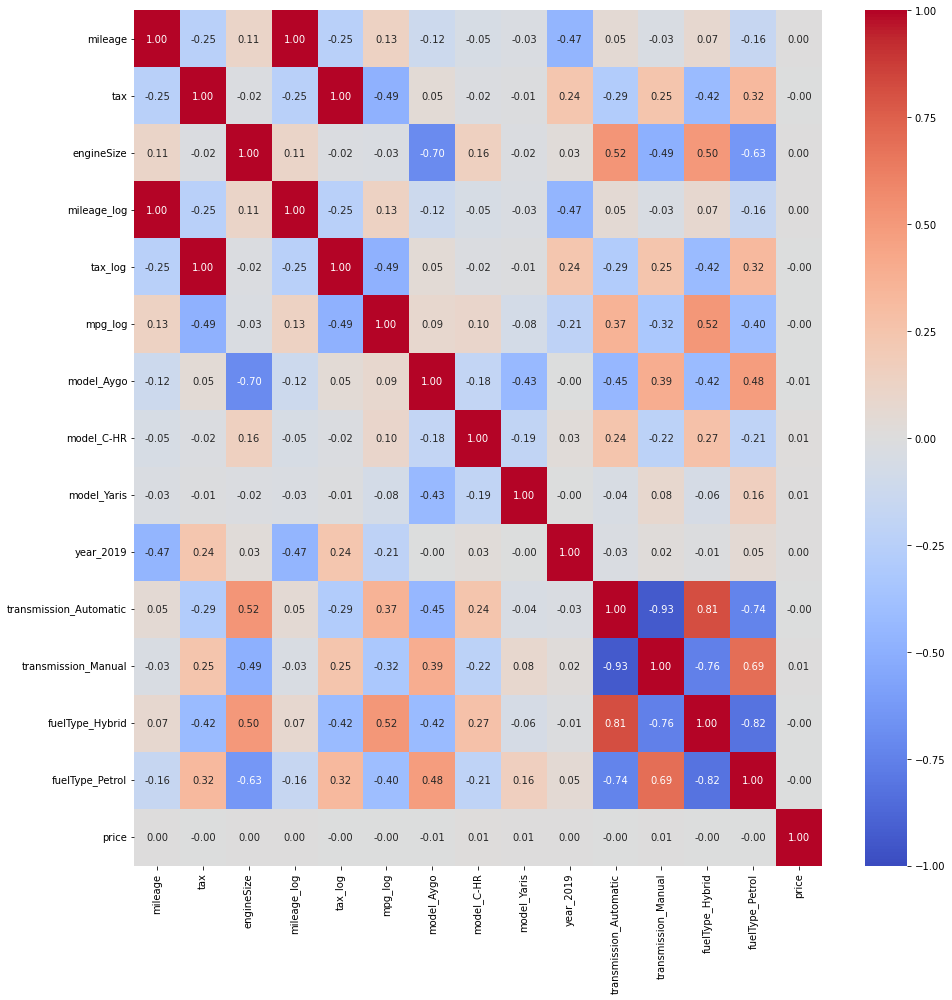

In [526]:
plt.figure(figsize=(14,14))
ax = sns.heatmap(corr, annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

In [527]:
feat = features2

# MACHINE LEARNING MODEL

In [528]:
from lazypredict.Supervised import LazyRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [529]:
reg = LazyRegressor(ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train[feat], X_test[feat], y_train, y_test)
print(models)

100%|██████████| 42/42 [00:34<00:00,  1.24it/s]

                               Adjusted R-Squared  R-Squared      RMSE  \
Model                                                                    
HistGradientBoostingRegressor                0.96       0.96   1302.36   
XGBRegressor                                 0.96       0.96   1302.51   
LGBMRegressor                                0.96       0.96   1316.21   
RandomForestRegressor                        0.95       0.95   1362.85   
ExtraTreesRegressor                          0.95       0.95   1431.65   
BaggingRegressor                             0.95       0.95   1438.40   
GradientBoostingRegressor                    0.94       0.94   1486.56   
KNeighborsRegressor                          0.94       0.94   1596.98   
DecisionTreeRegressor                        0.93       0.93   1687.25   
ExtraTreeRegressor                           0.91       0.91   1859.80   
PoissonRegressor                             0.89       0.89   2103.52   
LassoCV                               

In [530]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
reg = LinearRegression()
reg.fit(X_train[feat],y_train)
cv_results = cross_val_score(reg, X_train[feat], y_train, scoring='neg_root_mean_squared_error', cv=5)
print(abs(cv_results))
print(abs(np.mean(cv_results)))

[2447.38932406 2666.71060415 2563.75010286 2945.37780771 2775.90009311]
2679.8255863780555
